### Python BeautifulSoup

### Scraping Table from Static Web page

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
from selenium.webdriver.support.select import Select
#from selenium.webdriver.support.ui import select
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from random import randint
import urllib.parse
import warnings
warnings.filterwarnings('ignore')
headers = {"Accept-Language" : "en-US,en;q=0.5"}
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from selenium.common.exceptions import NoSuchElementException, ElementNotVisibleException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

In [2]:
website = 'https://www.jobsite.co.uk/'
# chrome_options = Options()
# chrome_options.add_argument("--lang=en");
# chrome_options.add_experimental_option('excludeSwitches', ['enable-logging'])
# prefs = {
#         "translate_whitelists": {'id':'en'},
#        "translate":{"enabled":"True"}}
# chrome_options.add_experimental_option("prefs", prefs)
#creating driver variable and providing the path where the chrome driver is stored
# driver = webdriver.Chrome('C:\webdrivers\chromedriver.exe',options=chrome_options)
driver = webdriver.Chrome('C:\webdrivers\chromedriver.exe')
time.sleep(2)
driver.get(website)
time.sleep(2)
driver.maximize_window()
time.sleep(2)

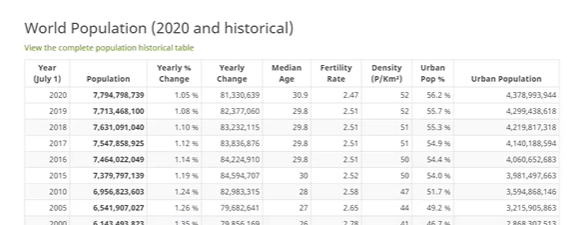

In [47]:
#Get the html of the web page into Python
import requests
from bs4 import BeautifulSoup

In [72]:
url = 'https://www.worldometers.info/world-population/'

In [73]:
page = requests.get(url)

In [74]:
page

<Response [200]>

In [75]:
soup = BeautifulSoup(page.text, 'lxml')

In [76]:
soup

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>World Population Clock: 8 Billion People (LIVE, 2022) - Worldometer</title> <meta content="How many people are there in the world? World population has reached 8 billion on November 15, 2022 according to the United Nations. World population live counter with data sheets, graphs, maps, and census data regarding the current, historical, and future world population figures, estimates, growth rates, densities and demographics" name="description"/><!-- Favicon --><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.

https://www.udemy.com/course/web-scraping-in-python-with-beautifulsoup-and-selenium/learn/lecture/23405873#questions

In [79]:
#Tables on a web page are mostly there in the table tag
#WE dont need the data of the whole page , we just need the html of the table

table  = soup.find('table' , {'class' : 'table table-striped table-bordered table-hover table-condensed table-list'})

In [80]:
table

<table class="table table-striped table-bordered table-hover table-condensed table-list"><thead> <tr> <th>Year<br/> (July 1) </th><th>Population</th><th>Yearly % <br/> Change</th><th>Yearly<br/> Change</th><th>Median <br/>Age</th><th>Fertility <br/>Rate</th><th>Density <br/>(P/Km²)</th> </tr><tr> <td>2020</td> <td><strong>7,794,798,739</strong></td> <td>1.05 %</td> <td>81,330,639</td> <td>30.9</td> <td>2.47</td> <td>52</td> </tr> <tr> <td>2019</td> <td><strong>7,713,468,100</strong></td> <td>1.08 %</td> <td>82,377,060</td> <td>29.8</td> <td>2.51</td> <td>52</td> </tr></thead><tbody><tr> <td>2018</td> <td><strong>7,631,091,040</strong></td> <td>1.10 %</td> <td>83,232,115</td> <td>29.8</td> <td>2.51</td> <td>51</td> </tr><tr> <td>2017</td> <td><strong>7,547,858,925</strong></td> <td>1.12 %</td> <td>83,836,876</td> <td>29.8</td> <td>2.51</td> <td>51</td> </tr><tr> <td>2016</td> <td><strong>7,464,022,049</strong></td> <td>1.14 %</td> <td>84,224,910</td> <td>29.8</td> <td>2.51</td> <td>50</

In [56]:
#Get all the Column Headers

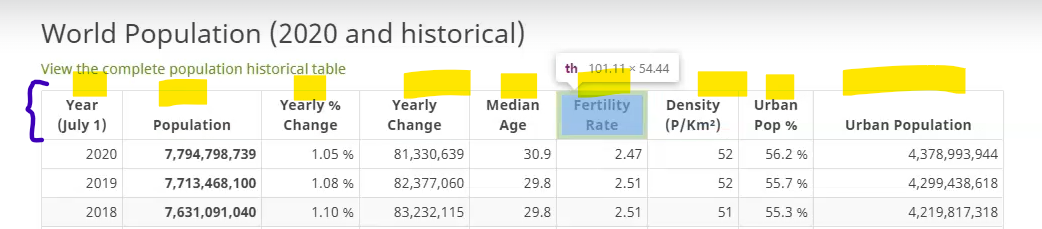

#### We can do soup.find_all 'th' and it should get all of the column "headings"

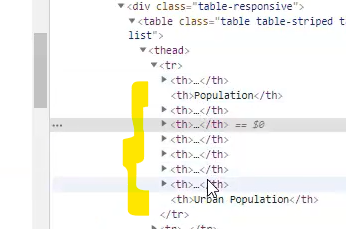

In [82]:
#We see all the column headers in the list
table.find_all('th')

[<th>Year<br/> (July 1) </th>,
 <th>Population</th>,
 <th>Yearly % <br/> Change</th>,
 <th>Yearly<br/> Change</th>,
 <th>Median <br/>Age</th>,
 <th>Fertility <br/>Rate</th>,
 <th>Density <br/>(P/Km²)</th>]

In [83]:
#Extracting text from header elements
headers = []

for i in table.find_all('th'):
    title = i.text
    headers.append(title)

In [84]:
headers

['Year (July 1) ',
 'Population',
 'Yearly %  Change',
 'Yearly Change',
 'Median Age',
 'Fertility Rate',
 'Density (P/Km²)']

In [99]:
#This below code is universal for all table data
#We have table as html here

df = pd.DataFrame(columns = headers)

In [100]:
df

,Year (July 1),Population,Yearly % Change,Yearly Change,Median Age,Fertility Rate,Density (P/Km²)


In [87]:
#Scraping data from inside the table
#Usually for any html table 
# <tr> tags correspond to the Rows and 
# <td> tags correspond to the data within it.

In [101]:
#We have the entire table here 
#we also see the header
#But we dont want the header
table.find_all('tr')

[<tr> <th>Year<br/> (July 1) </th><th>Population</th><th>Yearly % <br/> Change</th><th>Yearly<br/> Change</th><th>Median <br/>Age</th><th>Fertility <br/>Rate</th><th>Density <br/>(P/Km²)</th> </tr>,
 <tr> <td>2020</td> <td><strong>7,794,798,739</strong></td> <td>1.05 %</td> <td>81,330,639</td> <td>30.9</td> <td>2.47</td> <td>52</td> </tr>,
 <tr> <td>2019</td> <td><strong>7,713,468,100</strong></td> <td>1.08 %</td> <td>82,377,060</td> <td>29.8</td> <td>2.51</td> <td>52</td> </tr>,
 <tr> <td>2018</td> <td><strong>7,631,091,040</strong></td> <td>1.10 %</td> <td>83,232,115</td> <td>29.8</td> <td>2.51</td> <td>51</td> </tr>,
 <tr> <td>2017</td> <td><strong>7,547,858,925</strong></td> <td>1.12 %</td> <td>83,836,876</td> <td>29.8</td> <td>2.51</td> <td>51</td> </tr>,
 <tr> <td>2016</td> <td><strong>7,464,022,049</strong></td> <td>1.14 %</td> <td>84,224,910</td> <td>29.8</td> <td>2.51</td> <td>50</td> </tr>,
 <tr> <td>2015</td> <td><strong>7,379,797,139</strong></td> <td>1.19 %</td> <td>84,594

In [102]:
#We need to get rid of the header tag which is tghe first row , that is Index [0]
table.find_all('tr')[1 : ]

[<tr> <td>2020</td> <td><strong>7,794,798,739</strong></td> <td>1.05 %</td> <td>81,330,639</td> <td>30.9</td> <td>2.47</td> <td>52</td> </tr>,
 <tr> <td>2019</td> <td><strong>7,713,468,100</strong></td> <td>1.08 %</td> <td>82,377,060</td> <td>29.8</td> <td>2.51</td> <td>52</td> </tr>,
 <tr> <td>2018</td> <td><strong>7,631,091,040</strong></td> <td>1.10 %</td> <td>83,232,115</td> <td>29.8</td> <td>2.51</td> <td>51</td> </tr>,
 <tr> <td>2017</td> <td><strong>7,547,858,925</strong></td> <td>1.12 %</td> <td>83,836,876</td> <td>29.8</td> <td>2.51</td> <td>51</td> </tr>,
 <tr> <td>2016</td> <td><strong>7,464,022,049</strong></td> <td>1.14 %</td> <td>84,224,910</td> <td>29.8</td> <td>2.51</td> <td>50</td> </tr>,
 <tr> <td>2015</td> <td><strong>7,379,797,139</strong></td> <td>1.19 %</td> <td>84,594,707</td> <td>30</td> <td>2.52</td> <td>50</td> </tr>,
 <tr> <td>2010</td> <td><strong>6,956,823,603</strong></td> <td>1.24 %</td> <td>82,983,315</td> <td>28</td> <td>2.58</td> <td>47</td> </tr>,
 <t

In [103]:
df

,Year (July 1),Population,Yearly % Change,Yearly Change,Median Age,Fertility Rate,Density (P/Km²)


In [104]:
for i in table.find_all('tr')[1 : ]:
    row_data = i.find_all('td')
    row = [tr.text for tr in row_data] #extracting text from tr tags in the row data
    length = len(df) #finding how many rows are there in the dataframe
    df.loc[length] = row #using loc indexer to assign row data

In [97]:
#This is how first row looks
row

['1955', '2,773,019,936', '1.80 %', '47,317,757', '23', '4.97', '19']

In [105]:
df

,Year (July 1),Population,Yearly % Change,Yearly Change,Median Age,Fertility Rate,Density (P/Km²)
0,2020,"7,794,798,739",1.05 %,"81,330,639",30.9,2.47,52
1,2019,"7,713,468,100",1.08 %,"82,377,060",29.8,2.51,52
2,2018,"7,631,091,040",1.10 %,"83,232,115",29.8,2.51,51
3,2017,"7,547,858,925",1.12 %,"83,836,876",29.8,2.51,51
4,2016,"7,464,022,049",1.14 %,"84,224,910",29.8,2.51,50
5,2015,"7,379,797,139",1.19 %,"84,594,707",30,2.52,50
6,2010,"6,956,823,603",1.24 %,"82,983,315",28,2.58,47
7,2005,"6,541,907,027",1.26 %,"79,682,641",27,2.65,44
8,2000,"6,143,493,823",1.35 %,"79,856,169",26,2.78,41
9,1995,"5,744,212,979",1.52 %,"83,396,384",25,3.01,39


#### Finally we can export as Excel or csv